In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# inputs
########
MIN_TRAIN_SAMPLES = 300
########

dfs = []
count = 0
for name in os.listdir('./player_game_logs'):
    df = pd.read_csv(f"./player_game_logs/{name}/{name}_SUMMARY.csv")
    if df.loc[0]['n_train'] >= MIN_TRAIN_SAMPLES:
        count += 1
        dfs.append(df)
combined_df = pd.concat(dfs, ignore_index=True).set_index('model_type')
print(count)

1015


In [3]:
summary_df = combined_df.groupby(combined_df.index).mean()
pd.options.display.float_format = '{:,.4f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
summary_df.sort_values('r2_test', ascending=False)

,n_train,n_test,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test,y_test_mean,bias,Game of season_weight,Game for player_weight,Age (days)_weight,Home?_weight,Game Started?_weight,Year_weight,Month of Season_weight,Team_GSW_weight,Opponent_GSW_weight,Team_DET_weight,Opponent_DET_weight,Team_WSB_weight,Opponent_WSB_weight,Team_LAC_weight,Opponent_LAC_weight,Team_DAL_weight,Opponent_DAL_weight,Team_BOS_weight,Opponent_BOS_weight,Team_MEM_weight,Opponent_MEM_weight,Team_UTA_weight,Opponent_UTA_weight,Team_MIN_weight,Opponent_MIN_weight,Team_NJN_weight,Opponent_NJN_weight,Team_TOR_weight,Opponent_TOR_weight,Team_BRK_weight,Opponent_BRK_weight,Team_DEN_weight,Opponent_DEN_weight,Team_WAS_weight,Opponent_WAS_weight,Team_PHI_weight,Opponent_PHI_weight,Team_POR_weight,Opponent_POR_weight,Team_IND_weight,Opponent_IND_weight,Team_MIL_weight,Opponent_MIL_weight,Team_SAC_weight,Opponent_SAC_weight,Team_ATL_weight,Opponent_ATL_weight,Team_ORL_weight,Opponent_ORL_weight,Team_VAN_weight,Opponent_VAN_weight,Team_OKC_weight,Opponent_OKC_weight,Team_LAL_weight,Opponent_LAL_weight,Team_SDC_weight,Opponent_SDC_weight,Team_NOH_weight,Opponent_NOH_weight,Team_NYK_weight,Opponent_NYK_weight,Team_CHH_weight,Opponent_CHH_weight,Team_SEA_weight,Opponent_SEA_weight,Team_NOP_weight,Opponent_NOP_weight,Team_NOK_weight,Opponent_NOK_weight,Team_PHO_weight,Opponent_PHO_weight,Team_CHA_weight,Opponent_CHA_weight,Team_MIA_weight,Opponent_MIA_weight,Team_CLE_weight,Opponent_CLE_weight,Team_CHO_weight,Opponent_CHO_weight,Team_CHI_weight,Opponent_CHI_weight,Team_SAS_weight,Opponent_SAS_weight,Team_KCK_weight,Opponent_KCK_weight,Team_HOU_weight,Opponent_HOU_weight
model_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Random Forest (500 estimators, 5 depth)",567.0217,142.2621,22.9162,4.6603,0.4744,31.8506,5.5080,0.2470,10.4054,NaN,0.0647,0.0726,0.4227,0.0136,0.1751,0.0170,0.0178,0.0024,0.0072,0.0011,0.0050,0.0004,0.0018,0.0018,0.0057,0.0017,0.0057,0.0014,0.0061,0.0006,0.0033,0.0014,0.0053,0.0020,0.0048,0.0015,0.0040,0.0027,0.0043,0.0007,0.0019,0.0025,0.0071,0.0014,0.0043,0.0019,0.0057,0.0017,0.0056,0.0018,0.0051,0.0021,0.0062,0.0022,0.0057,0.0025,0.0055,0.0017,0.0053,0.0005,0.0010,0.0004,0.0024,0.0008,0.0059,0.0000,0.0003,0.0003,0.0014,0.0013,0.0053,0.0012,0.0019,0.0012,0.0039,0.0004,0.0015,0.0003,0.0004,0.0014,0.0064,0.0008,0.0017,0.0013,0.0046,0.0014,0.0050,0.0008,0.0014,0.0014,0.0051,0.0009,0.0052,0.0001,0.0005,0.0016,0.0054
"Random Forest (100 estimators, 5 depth)",567.0217,142.2621,22.9700,4.6659,0.4731,31.9140,5.5134,0.2454,10.4054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Random Forest (50 estimators, 5 depth)",567.0217,142.2621,23.0328,4.6727,0.4714,31.9761,5.5196,0.2432,10.4054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Random Forest (20 estimators, 5 depth)",567.0217,142.2621,23.2386,4.6937,0.4667,32.1984,5.5386,0.2381,10.4054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lasso (lambda=0.05),567.0217,142.2621,32.1580,5.5456,0.2518,33.7426,5.6625,0.2099,10.4054,7.0148,0.1327,0.8108,-0.2

In [ ]:
##### r2_test vs. n_train analysis

In [126]:
dfs = {}
for name in os.listdir('./player_game_logs'):
    df = pd.read_csv(f"./player_game_logs/{name}/{name}_SUMMARY.csv")
    if df.loc[0]['n_train'] >= MIN_TRAIN_SAMPLES:
        dfs[name] = df.set_index('model_type')

data = []
for player, df in dfs.items():
    for model in df.index:
        n_train = df.loc[model, 'n_train']
        r2_test = df.loc[model, 'r2_test']
        data.append({'Player': player, 'Model': model, 'n_train': n_train, 'r2_test': r2_test})
combined_df = pd.DataFrame(data)

In [43]:
combined_df

,Player,Model,n_train,r2_test
0,tre_jones,LinReg,171,0.3612
1,tre_jones,"Random Forest (100 estimators, 20 depth)",171,0.3275
2,tre_jones,"Random Forest (50 estimators, 10 depth)",171,0.3728
3,tre_jones,"Random Forest (20 estimators, 5 depth)",171,0.3516
4,tre_jones,Ridge (lambda=1.0),171,0.4075
...,...,...,...,...
31641,brian_quinnett,"Random Forest (500 estimators, 5 depth)",110,-0.3368
31642,brian_quinnett,SVM (rbf kernel),110,-0.2932
31643,brian_quinnett,SVM (poly kernel),110,-0.1305
31644,brian_quinnett,SVM (linear kernel),110,-1.1274


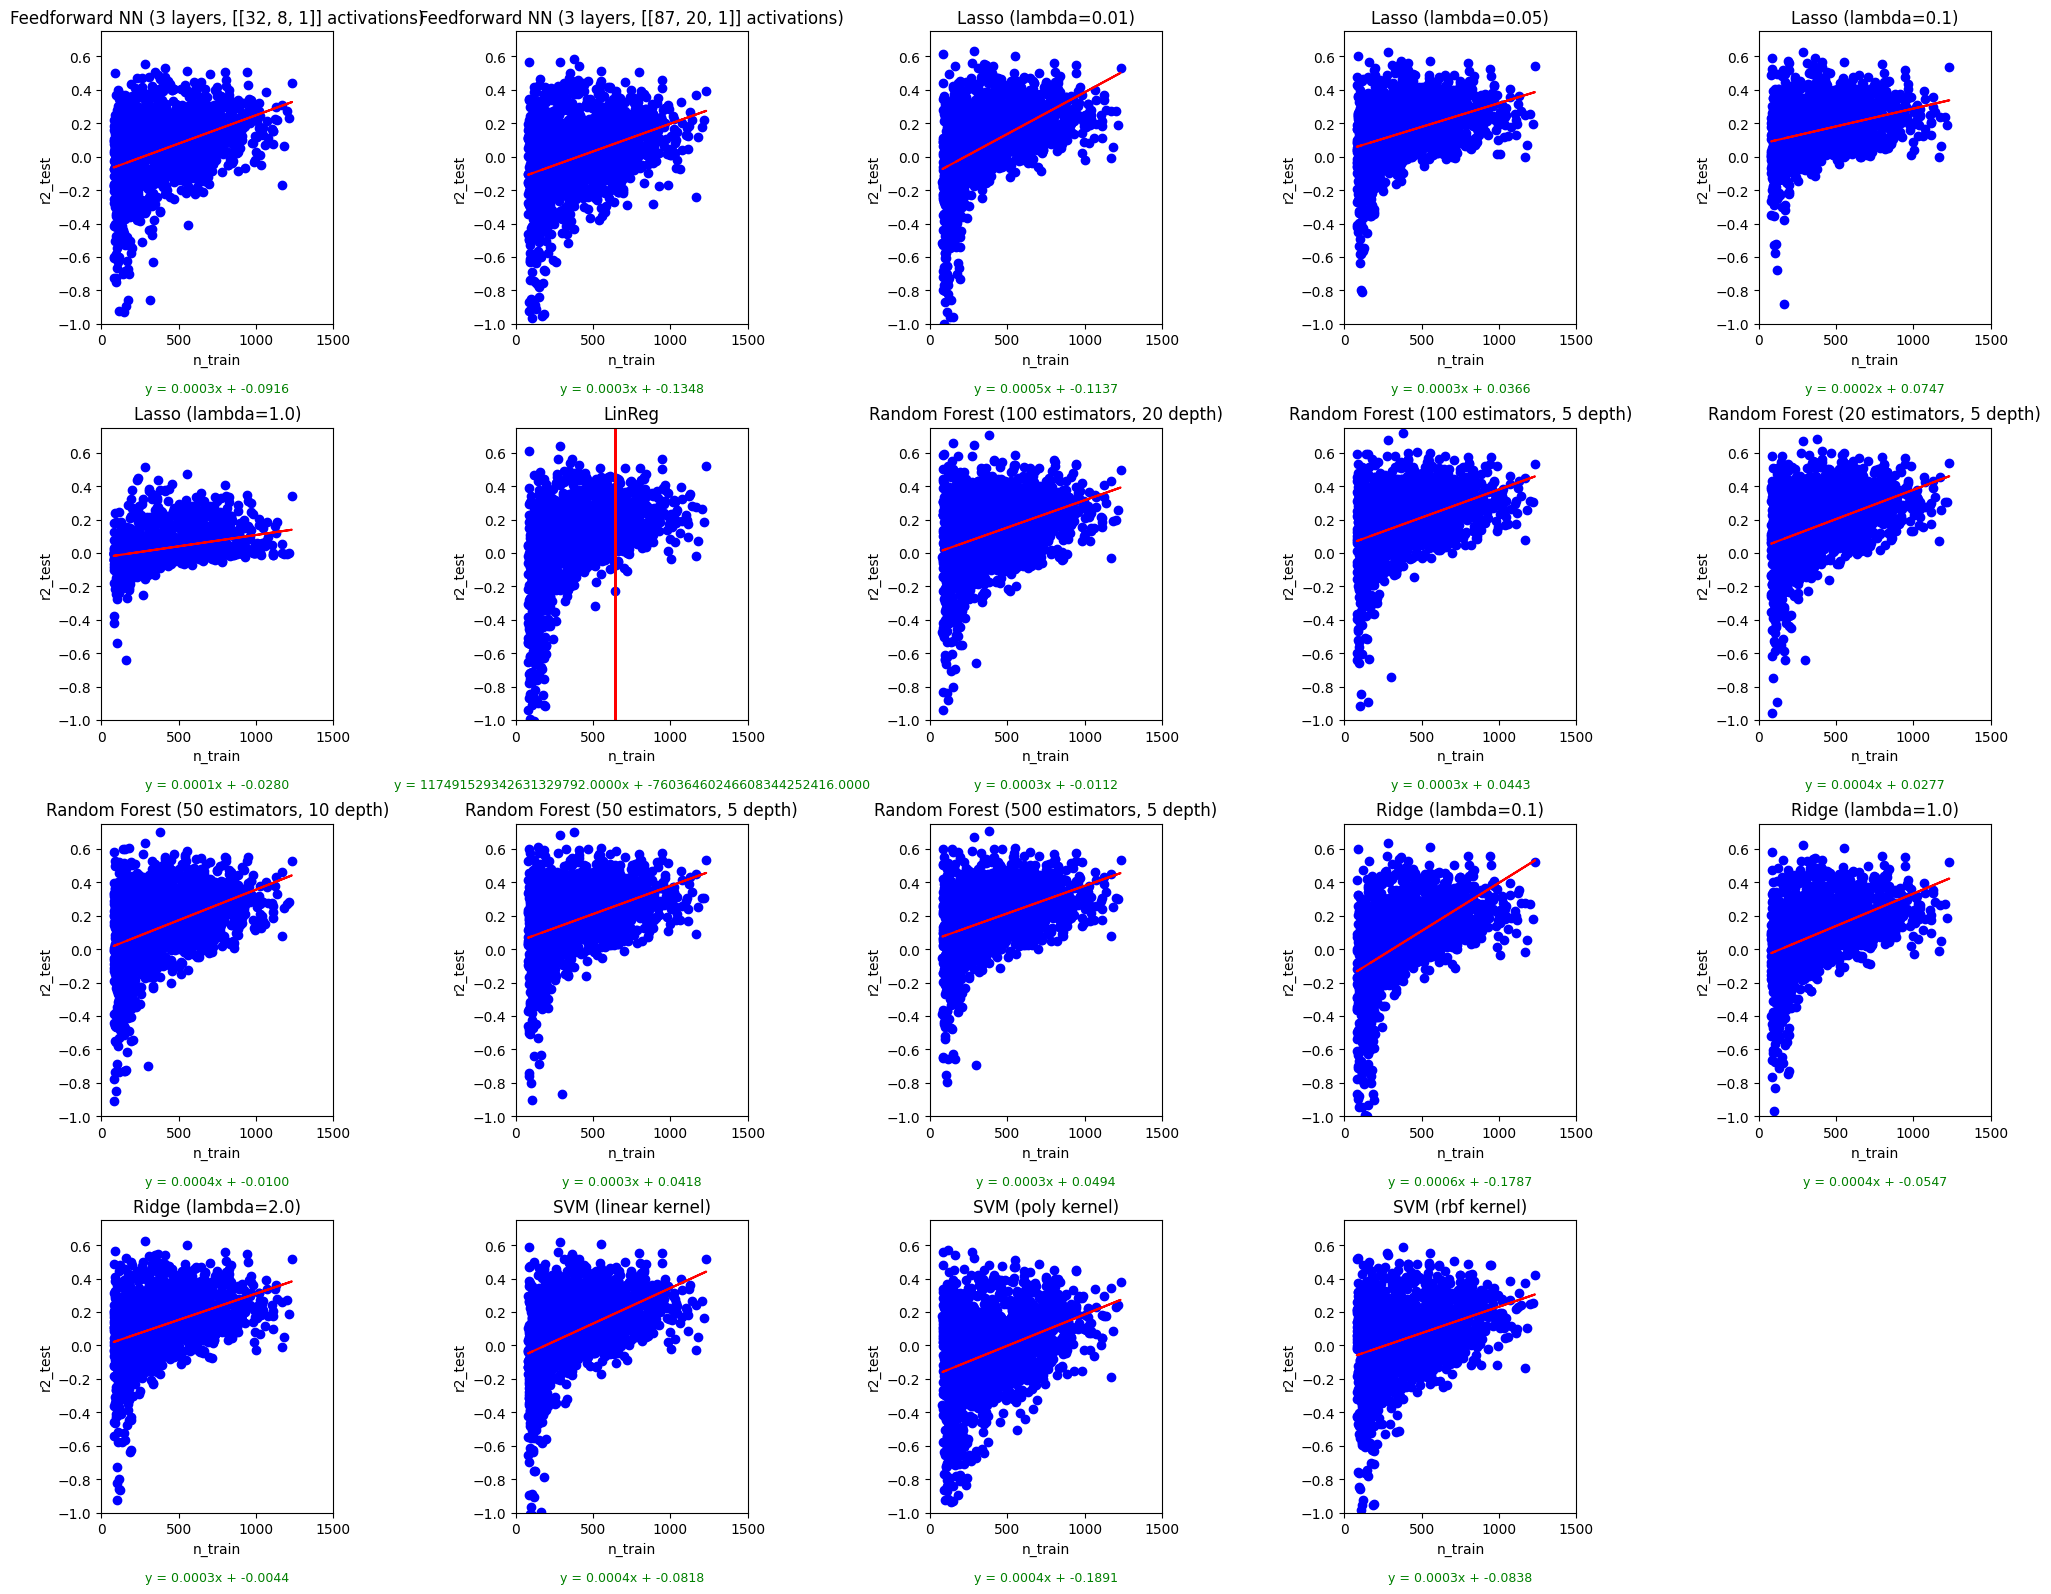

In [127]:
# Determine layout
models = sorted(combined_df['Model'].unique())
fig, axs = plt.subplots(4, 5, figsize=(20, 16))  # Adjust the figsize as needed
axs = axs.flatten()  # Flatten the axis array

# Predefined axes limits
x_limits = (0, 1500)
y_limits = (-1.0, 0.75)

# Plotting with modifications
for i, model in enumerate(models):
    model_df = combined_df[combined_df['Model'] == model]
    # Plot points
    axs[i].scatter(model_df['n_train'], model_df['r2_test'], color='blue')
    axs[i].set_xlim(x_limits)
    axs[i].set_ylim(y_limits)
    
    # Best-fit line and equation
    if not model_df.empty:
        x = model_df['n_train']
        y = model_df['r2_test']
        m, b = np.polyfit(x, y, 1)  # Linear fit
        axs[i].plot(x, m*x + b, color='red')  # Add the best-fit line
        equation_text = f'y = {m:.4f}x + {b:.4f}'
    else:
        equation_text = 'No data'

    # Set title with model and below add equation text
    axs[i].set_title(f'{model}')
    axs[i].set_xlabel('n_train')
    axs[i].set_ylabel('r2_test')
    axs[i].text(0.5, -0.2, equation_text, transform=axs[i].transAxes, ha="center", va="top", fontsize=9, color="green")

# Hide unused subplots
for ax in axs[len(models):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
### TOP MODELS Analysis

In [107]:
dfs = {}
for name in os.listdir('./player_game_logs'):
    dfs[name] = pd.read_csv(f"./player_game_logs/{name}/{name}_SUMMARY.csv")

# Step 1: Combine the DataFrames
data = []
for player, df in dfs.items():
    df_copy = df.copy()
    df_copy.insert(0, 'player_name', player)
    data.append(df_copy)
combined_df = pd.concat(data)

# Step 2 and 3: Group by ModelType, sort by r2_test, and get top 10 for each group
top_models_per_type = combined_df.groupby('model_type').apply(lambda x: x.sort_values('r2_test', ascending=False).head(50))

# Reset index if you want a cleaner DataFrame
top_models_per_type = top_models_per_type.reset_index(drop=True)

In [108]:
top_models_per_type['model_type'].unique()

array(['Feedforward NN (3 layers, [[32, 8, 1]] activations)',
       'Feedforward NN (3 layers, [[87, 20, 1]] activations)',
       'Lasso (lambda=0.01)', 'Lasso (lambda=0.05)', 'Lasso (lambda=0.1)',
       'Lasso (lambda=1.0)', 'LinReg',
       'Random Forest (100 estimators, 20 depth)',
       'Random Forest (100 estimators, 5 depth)',
       'Random Forest (20 estimators, 5 depth)',
       'Random Forest (50 estimators, 10 depth)',
       'Random Forest (50 estimators, 5 depth)',
       'Random Forest (500 estimators, 5 depth)', 'Ridge (lambda=0.1)',
       'Ridge (lambda=1.0)', 'Ridge (lambda=2.0)', 'SVM (linear kernel)',
       'SVM (poly kernel)', 'SVM (rbf kernel)'], dtype=object)

In [109]:
model = 'Random Forest (500 estimators, 5 depth)'
linear_models_no_linreg = [
    'Lasso (lambda=0.01)', 'Lasso (lambda=0.05)', 
    'Lasso (lambda=0.1)',
    'Lasso (lambda=1.0)', 'Ridge (lambda=0.1)',
    'Ridge (lambda=1.0)', 'Ridge (lambda=2.0)'
]
top_linear_models = top_models_per_type[top_models_per_type['model_type'].isin(linear_models_no_linreg)]

In [113]:
top_linear_models

,player_name,model_type,n_train,n_test,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test,y_test_mean,bias,Game of season_weight,Game for player_weight,Age (days)_weight,Home?_weight,Game Started?_weight,Year_weight,Month of Season_weight,Team_GSW_weight,Opponent_GSW_weight,Team_DET_weight,Opponent_DET_weight,Team_WSB_weight,Opponent_WSB_weight,Team_LAC_weight,Opponent_LAC_weight,Team_DAL_weight,Opponent_DAL_weight,Team_BOS_weight,Opponent_BOS_weight,Team_MEM_weight,Opponent_MEM_weight,Team_UTA_weight,Opponent_UTA_weight,Team_MIN_weight,Opponent_MIN_weight,Team_NJN_weight,Opponent_NJN_weight,Team_TOR_weight,Opponent_TOR_weight,Team_BRK_weight,Opponent_BRK_weight,Team_DEN_weight,Opponent_DEN_weight,Team_WAS_weight,Opponent_WAS_weight,Team_PHI_weight,Opponent_PHI_weight,Team_POR_weight,Opponent_POR_weight,Team_IND_weight,Opponent_IND_weight,Team_MIL_weight,Opponent_MIL_weight,Team_SAC_weight,Opponent_SAC_weight,Team_ATL_weight,Opponent_ATL_weight,Team_ORL_weight,Opponent_ORL_weight,Team_VAN_weight,Opponent_VAN_weight,Team_OKC_weight,Opponent_OKC_weight,Team_LAL_weight,Opponent_LAL_weight,Team_SDC_weight,Opponent_SDC_weight,Team_NOH_weight,Opponent_NOH_weight,Team_NYK_weight,Opponent_NYK_weight,Team_CHH_weight,Opponent_CHH_weight,Team_SEA_weight,Opponent_SEA_weight,Team_NOP_weight,Opponent_NOP_weight,Team_NOK_weight,Opponent_NOK_weight,Team_PHO_weight,Opponent_PHO_weight,Team_CHA_weight,Opponent_CHA_weight,Team_MIA_weight,Opponent_MIA_weight,Team_CLE_weight,Opponent_CLE_weight,Team_CHO_weight,Opponent_CHO_weight,Team_CHI_weight,Opponent_CHI_weight,Team_SAS_weight,Opponent_SAS_weight,Team_KCK_weight,Opponent_KCK_weight,Team_HOU_weight,Opponent_HOU_weight
100,shai_gilgeous-alexander,Lasso (lambda=0.01),284,72,40.1822,6.3389,0.5984,41.1298,6.4133,0.6326,22.1944,13.7954,9.6291,-8.9113,17.7057,1.7889,-0.0000,-0.0000,0.0000,0.0000,0.3169,0.0000,1.5769,0.0000,0.0000,-4.4113,-0.0000,0.0000,-1.5275,0.0000,-0.1875,0.0000,-1.9607,0.0000,-0.0000,0.0000,0.6392,0.0000,0.0000,0.0000,0.7774,0.0000,1.3976,0.0000,-3.9930,0.0000,0.5748,0.0000,-2.1400,0.0000,1.8901,0.0000,-1.6765,0.0000,-0.0000,0.0000,3.6784,0.0000,0.0565,0.0000,0.6974,0.0000,0.0000,0.0102,-5.7882,0.0000,-0.1171,0.0000,0.0000,0.0000,0.0000,0.0000,1.4468,0.0000,0.0000,0.0000,0.0000,0.0000,-1.2799,0.0000,0.0000,0.0000,1.2383,0.0000,0.0000,0.0000,-3.2892,0.0000,2.0587,0.0000,1.3704,0.0000,-0.0000,0.0000,-0.6411,0.0000,0.0000,0.0000,-0.3839
101,tarence_kinsey,Lasso (lambda=0.01),87,22,9.7294,3.1192,0.7283,26.0522,5.1041,0.6134,5.1364,2.3543,-7.3970,11.1981,0.0000,-1.9234,9.7728,-1.4439,-0.7332,0.0000,2.7005,0.0000,0.3824,0.0000,0.0000,0.0000,-3.6507,0.0000,0.7079,0.0000,0.0000,3.5793,0.0000,0.0000,3.7832,0.0000,0.0000,0.0000,-1.3078,0.0000,-0.0000,0.0000,0.0000,0.0000,-1.1228,0.0000,-1.4887,0.0000,0.0000,0.0000,-2.1323,0.0000,0.3687,0.0000,-2.9244,0.0000,3.1079,0.0000,0.2165,0.0000,-0.0000,0.0000,0.0000,0.0000,3.9894,0.0000,0.9068,0.0000,0.0000,0.0000,-0.0000,0.0000,0.6413,0.0000,0.0000,0.0000,-0.6620,0.0000,0.0000,0.0000,4.7737,0.0000,-4.2262,0.0000,0.0000,0.0000,-2.7753,-0.0425,-0.2149,0.0000,0.0000,0.0000,-0.9173,0.0000,-1.0037,0.0000,0.0000,0.0000,-0.7759
102,tony_campbell,Lasso (lambda=0.01),552,138,34.8043,5.8995,0.5692,33.5205,5.7897,0.6053,10.3261,14.6735,0.0000,0.0000,-10.4689,-0.2063,3.8411,-0.0000,2.0030,0.0000,0.0000,-8.5118,-0.0050,0.0000,-0.1492,0.0000,0.3621,2.3552,0.0000,0.0000,1.7039,0.0000,0.0000,0.0000,0.7645,7.6716,-0.0000,0.0000,1.2112,0.0000,0.0000,0.0000,0.0000,0.0000,1.7652,0.0000,0.0000,0.0000,-0.5683,0.0000,-0.5808,0.0000,-0.8814,0.0000,0.0717,0.0000,-0.5332,0.0000,0.3085,0.0000,1.1796,0.0000,0.0000,0.0000,0.0000,-4.4837,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.7186,-0.3418,0.0000,2.4857,0.0000,-1.6853,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0322,0.0000,0.0000,0.0000,1.5023,0.6079,1.4137,0.0000,0.0000,0.0000,-0.0247,0.0000,-0.0242,0.0000,0.0000,0.0000,-1.1557
103,stacey_augmon,Lasso (lambda=0.01),800,201,22.1569,4.7071,0.5031,21.1747,4.6016,0.5614,8.1244,4.03

In [121]:
means = top_linear_models.drop(columns=['player_name', 'model_type', 'n_train', 'n_test', 'mse_train', 'rmse_train', 'r2_train', 'mse_test', 'rmse_test', 'r2_test', 'y_test_mean', 'bias']).mean()
avg_weights = pd.DataFrame(means).reset_index()
avg_weights.columns = ['weight_name', 'weight_avg']
avg_weights.sort_values('weight_avg', ascending=False).head(10)

,weight_name,weight_avg
4,Game Started?_weight,5.1342
1,Game for player_weight,1.3790
2,Age (days)_weight,0.8291
44,Opponent_SAC_weight,0.5728
5,Year_weight,0.5573
8,Opponent_GSW_weight,0.4349
25,Team_NJN_weight,0.3682
13,Team_LAC_weight,0.2974
23,Team_MIN_weight,0.2753
45,Team_ATL_weight,0.2743


In [122]:
avg_weights.sort_values('weight_avg', ascending=False).tail(10) ablation

,weight_name,weight_avg
35,Team_PHI_weight,-0.1573
7,Team_GSW_weight,-0.1607
22,Opponent_UTA_weight,-0.1897
53,Team_LAL_weight,-0.2091
42,Opponent_MIL_weight,-0.2149
28,Opponent_TOR_weight,-0.2315
60,Opponent_NYK_weight,-0.2626
9,Team_DET_weight,-0.3274
74,Opponent_MIA_weight,-0.3513
6,Month of Season_weight,-0.7053


In [45]:
ds = pd.read_csv('./player_game_logs/derek_strong/derek_strong_SUMMARY.csv')
ds.sort_values('r2_test', ascending=False)

,model_type,n_train,n_test,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test,y_test_mean,bias,Game of season_weight,Game for player_weight,Age (days)_weight,Home?_weight,Game Started?_weight,Year_weight,Month of Season_weight,Team_GSW_weight,Opponent_GSW_weight,Team_DET_weight,Opponent_DET_weight,Team_WSB_weight,Opponent_WSB_weight,Team_LAC_weight,Opponent_LAC_weight,Team_DAL_weight,Opponent_DAL_weight,Team_BOS_weight,Opponent_BOS_weight,Team_MEM_weight,Opponent_MEM_weight,Team_UTA_weight,Opponent_UTA_weight,Team_MIN_weight,Opponent_MIN_weight,Team_NJN_weight,Opponent_NJN_weight,Team_TOR_weight,Opponent_TOR_weight,Team_BRK_weight,Opponent_BRK_weight,Team_DEN_weight,Opponent_DEN_weight,Team_WAS_weight,Opponent_WAS_weight,Team_PHI_weight,Opponent_PHI_weight,Team_POR_weight,Opponent_POR_weight,Team_IND_weight,Opponent_IND_weight,Team_MIL_weight,Opponent_MIL_weight,Team_SAC_weight,Opponent_SAC_weight,Team_ATL_weight,Opponent_ATL_weight,Team_ORL_weight,Opponent_ORL_weight,Team_VAN_weight,Opponent_VAN_weight,Team_OKC_weight,Opponent_OKC_weight,Team_LAL_weight,Opponent_LAL_weight,Team_SDC_weight,Opponent_SDC_weight,Team_NOH_weight,Opponent_NOH_weight,Team_NYK_weight,Opponent_NYK_weight,Team_CHH_weight,Opponent_CHH_weight,Team_SEA_weight,Opponent_SEA_weight,Team_NOP_weight,Opponent_NOP_weight,Team_NOK_weight,Opponent_NOK_weight,Team_PHO_weight,Opponent_PHO_weight,Team_CHA_weight,Opponent_CHA_weight,Team_MIA_weight,Opponent_MIA_weight,Team_CLE_weight,Opponent_CLE_weight,Team_CHO_weight,Opponent_CHO_weight,Team_CHI_weight,Opponent_CHI_weight,Team_SAS_weight,Opponent_SAS_weight,Team_KCK_weight,Opponent_KCK_weight,Team_HOU_weight,Opponent_HOU_weight
13,"Random Forest (500 estimators, 5 depth)",364,92,16.2523,4.0314,0.5036,21.9609,4.6862,0.3483,6.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Random Forest (50 estimators, 5 depth)",364,92,16.1892,4.0236,0.5055,22.2285,4.7147,0.3403,6.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,"Random Forest (100 estimators, 5 depth)",364,92,16.4756,4.0590,0.4968,22.2489,4.7169,0.3397,6.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Random Forest (100 estimators, 20 depth)",364,92,4.0261,2.0065,0.8770,22.7044,4.7649,0.3262,6.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Random Forest (50 estimators, 10 depth)",364,92,7.1119,2.6668,0.7828,22.9717,4.7929,0.3183,6.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Random Forest (20 estimators, 5 depth)",364,92,16.6164